<a href="https://colab.research.google.com/github/PAYAL980/Bluetooth_Chat_App-Android/blob/master/MPS_Initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install quimb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.2/449.2 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 6.3 MB/s eta 0:00:00


In [3]:
from quimb import *
from quimb.tensor.tensor_1d import MatrixProductState
import numpy as np

In [4]:
# Function to create an array to be used as input for the polynomial function

def input_to_fun(start, stop, num_of_qubits):

    return np.arange(start, stop, step=1/(2**num_of_qubits))

In [5]:
# define the polynomial function here
# which: 1-> e^(i 2pi x)/2 ;     2-> e^(-i 2pi x)/2

def polynomial_fun(x, which):

    if which==1:
        fun = np.exp(2j*pi*x)/2

    if which==2:
        fun = np.exp(-2j*pi*x)/2

    return fun

In [6]:
# function to return MPS
    # which_fun: 1->e^(i 2pi x)/2 ;     2-> e^(-i 2pi x)/2
    # num_of_qubits: number of qubits/sites
    # start, stop : range for the input function


def function_to_mps(which_fun, num_of_qubits, start, stop, cutoff):

    inputToFun =  input_to_fun(start, stop, num_of_qubits)

    state = polynomial_fun(inputToFun, which_fun)

    psi = MatrixProductState.from_dense(state, dims= [2]*num_of_qubits, method = 'svd', cutoff = cutoff, absorb = 'right')

    return psi

## Fun: cos(2pix), Number of qubits: 4

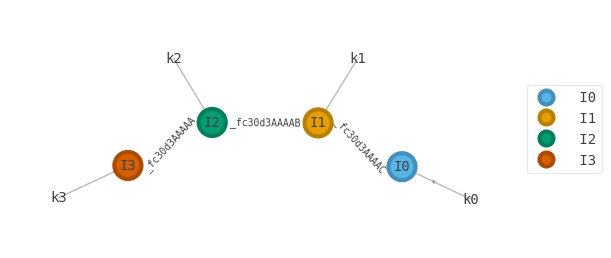

In [7]:
psi1 = function_to_mps(1, 4, 0, 1, 1e-4)
psi1.draw(color=['I0', 'I1', 'I2', 'I3'], show_inds='all')

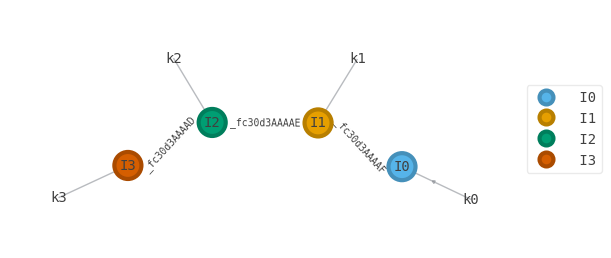

In [8]:
psi2 = function_to_mps(2, 4, 0, 1, 1e-4)
psi2.draw(color=['I0', 'I1', 'I2', 'I3'], show_inds='all')

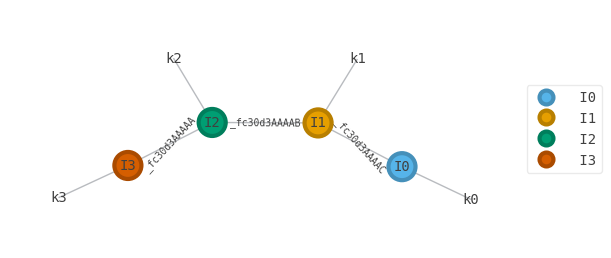

In [9]:
psi = psi1.add_MPS(psi2)
psi.draw(color=['I0', 'I1', 'I2', 'I3'], show_inds='all')

In [10]:
psi.tensor_map

{0: Tensor(shape=(2, 2), inds=('k0', '_fc30d3AAAAC'), tags=oset(['I0'])),
 1: Tensor(shape=(2, 2, 2), inds=('_fc30d3AAAAC', 'k1', '_fc30d3AAAAB'), tags=oset(['I1'])),
 2: Tensor(shape=(2, 2, 2), inds=('_fc30d3AAAAB', 'k2', '_fc30d3AAAAA'), tags=oset(['I2'])),
 3: Tensor(shape=(2, 2), inds=('_fc30d3AAAAA', 'k3'), tags=oset(['I3']))}

In [11]:
for iz in range(4):
    print(f'{iz}:{psi.tensor_map[iz].get_params()}')

0:[[-0.70710678-5.21087597e-17j -0.70710678+5.21087597e-17j]
 [ 0.70710678-8.29203642e-17j  0.70710678+8.29203642e-17j]]
1:[[[0.70710678+0.j         0.        +0.j        ]
  [0.        +0.70710678j 0.        +0.j        ]]

 [[0.        +0.j         0.70710678+0.j        ]
  [0.        +0.j         0.        -0.70710678j]]]
2:[[[0.70710678+0.j  0.        +0.j ]
  [0.5       +0.5j 0.        +0.j ]]

 [[0.        +0.j  0.70710678+0.j ]
  [0.        +0.j  0.5       -0.5j]]]
3:[[-1.41421356+0.j        -1.30656296-0.5411961j]
 [-1.41421356+0.j        -1.30656296+0.5411961j]]


In [12]:
params = psi.tensor_map

KP = psi.contract(tags=['I1', 'I2', 'I3', 'I0'])
np.round(KP.get_params(),3).reshape(1,16)

array([[ 1.   +0.j,  0.924-0.j,  0.707+0.j,  0.383+0.j, -0.   +0.j,
        -0.383+0.j, -0.707-0.j, -0.924+0.j, -1.   +0.j, -0.924-0.j,
        -0.707+0.j, -0.383-0.j, -0.   +0.j,  0.383-0.j,  0.707-0.j,
         0.924+0.j]])

In [13]:
np.round(np.cos(2*np.pi*input_to_fun(0,1,4)),3)

array([ 1.   ,  0.924,  0.707,  0.383,  0.   , -0.383, -0.707, -0.924,
       -1.   , -0.924, -0.707, -0.383, -0.   ,  0.383,  0.707,  0.924])